In [10]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from keras.callbacks import TensorBoard

from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint


import skimage
from skimage.transform import resize
from  skimage import transform
from skimage.util import img_as_ubyte

import scipy

import pickle
import time

import pandas as pd
from PIL import Image 

tf.compat.v1.disable_eager_execution() 

batch_size = 32
num_classes = 10
epochs = 12
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

img_rows, img_cols = 224, 224

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_train = x_train.resize(-1, 224, 224 ,3)
#x_test = x_test.resize(-1, 224, 224 ,3)
#x_train = cv2.resize(x_train[0],(224,224))
#x_test = cv2.resize(x_test,(224,224))

x_train = np.resize(x_train, (len(x_train), img_rows, img_cols, 3))
x_test = np.resize(x_test, (len(x_test), img_rows, img_cols, 3))

#plt.imshow(x_train[9])
#plt.show()
  

#x_train = skimage.transform.resize(x_train, (len(x_train), 40, 40, 3), mode='constant')
        


#x_test = skimage.transform.resize(x_test, (len(x_test), 40, 40, 3), mode='constant')





MemoryError: Unable to allocate 56.1 GiB for an array with shape (50000, 224, 224, 3) and data type float64

In [7]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (224, 224, 3, 3)
x_test shape: (224, 224, 3, 3)
224 train samples
224 test samples


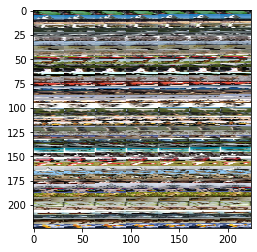

In [4]:
plt.imshow(x_train[5])
plt.show()

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NAME = "CIFAR-10-{}".format(int(time.time()))

#model = load_model("first_model.h5")

model = Sequential()

model.add(VGG16(include_top=False, weights='imagenet', input_shape = (32, 32, 3)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = checkpoint

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'],
              )



#new_shape = (224, 224, 3)
#x_train = np.asarray([transform.resize(x_train, new_shape) for x_train in x_train])

#new_shape = (224,224,3)
#x_train = [skimage.transform.resize(x_train, new_shape) for x_train in x_train]
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


datagen = ImageDataGenerator(validation_split=0.2)

datagen.fit(x_train)



model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    validation_data=(x_train, y_train),
                    epochs=epochs,
                    callbacks=[tensorboard])
                    


ValueError: setting an array element with a sequence.

In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 256)         1179904   
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 256)         590080    
_________________________________________________________________
activation_2 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [4]:
from keras.models import load_model 
model.save("second_model.h5")
model.save_weights("second_model_weights.h5")

In [5]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 253us/step
Test loss: 0.5853327170014382
Test accuracy: 0.8608999848365784


In [6]:
pred=model.predict(x_test, verbose=1)

10000/10000 [==============================] - 3s 252us/step


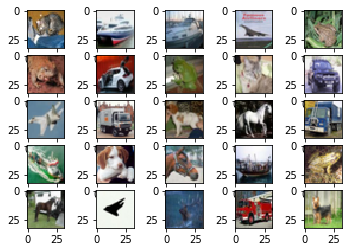

TypeError: Image data of dtype object cannot be converted to float

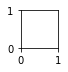

In [35]:
from matplotlib import pyplot
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow((X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:25])



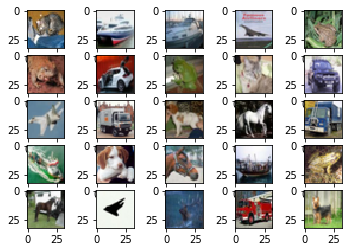

['dog', 'ship', 'ship', 'airplane', 'frog', 'automobile', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'automobile', 'airplane', 'bird', 'truck', 'dog']


In [8]:
import numpy as np

show_imgs(x_test[:25])
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:25]),1)
print ([labels[x] for x in indices])

In [82]:
preds_cls_idx = pred.argmax(axis=-1)

import numpy as np

idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(valid_generator.filenames, preds_cls))


In [12]:
preds_cls_idx = pred.argmax(axis=-1)

import numpy as np

idx_to_cls = {v: k for k, v in x_train()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(x_test, preds_cls))

TypeError: 'numpy.ndarray' object is not callable

In [29]:
import pandas as pd

filenames_to_cls = list(zip(x_test))
results=pd.DataFrame({ "file":filenames_to_cls,
                          "prediction_airplane": pred [:,0],
                          "prediction_automobile": pred [:,1],
                          "prediction_bird": pred [:,2],
                          "prediction_cat": pred [:,3],
                          "prediction_deer": pred [:,4],
                          "prediction_dog": pred [:,5],
                          "prediction_frog": pred [:,6],
                          "prediction_horse": pred [:,7],
                          "prediction_ship": pred [:,8],
                          "prediction_truck": pred [:,9],
                          "class":indices [24], "class_name": labels[9]})

results.to_csv("results8.csv",index=False)

In [47]:
test_image1 =image.load_img('/home/trojan/Desktop/adorable-image-of-lapphund-puppy.jpg',target_size =(32,32))

test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
#test_image = test_image.astype('float32')

pred=model.predict(test_image, verbose=1)

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

indices2 = np.argmax(model.predict(test_image),1)
                     
print([labels[x] for x in indices2])

1/1 [==============================] - 0s 17ms/step
['dog']
